# EDA (탐색적 데이터 분석)

- 데이터를 깊이 이해하는 과정
- 어떤 정보가 들어 있는지 파악하는 것이 중요
- `EDA`를 통해 데이터의 분포와 패턴을 보고, 이상값이나 결측값이 있는지도 확인
- EDA 대표 방법
  - 데이터의 기본 통계 확인 ( 평균 최댓값, 최솟값 등 )
  - 데이터 안에서 특이한 점이 있는지 확인
  - 변수들 간의 관계를 분석
  - 결측값
  - 데이터를 시각화 

# EDA를 마치면 전처리 과정 

- 모델을 학습시키기 전 정리하는 과정
- 결측값 처리
  - 단순 삭제 또는 평균이나 중앙값으로 대체 
- 이상치 처리 ( 극단적으로 크거나 작은 값은 모델 학습에 방해가 됨. -> 적절히 조정하거나 제거 )

- EDA와 기본 전처리는 모델을 학습시키기전에 필요한 과정
  - 모델이 잘못 된 패턴을 학습하거나 성능 저하가 될 수 있는 걸 막을 수 있다. 
  - 이상값이나 결측값을 줄이고 데이터 품질을 높임
  - 데이터를 제대로 이해해야 정확한 가정으로 모델을 설계할 수 있다. 
- 탐색적 데이터 분석과 전처리 과정은 데이터 품질을 개선하고, 모델의 성능과 신뢰성을 높이는 핵심 과정

# seaborn의 sns 사용 용도

seaborn(sns)은 matplotlib 기반의 통계적 데이터 시각화 라이브러리입니다.

## 예시 파일
[예시 파일 링크](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv)

## 답변

seaborn(sns)은 주로 다음과 같은 용도로 사용됩니다:

1. **통계적 시각화**: 히스토그램, 박스플롯, 바이올린플롯
2. **관계 분석**: 산점도, 회귀선이 포함된 그래프
3. **분포 분석**: 분포도, 밀도 플롯
4. **범주형 데이터 시각화**: 막대그래프, 카운트플롯
5. **상관관계 분석**: 히트맵, 페어플롯

### 주요 함수들
- `sns.histplot()`: 히스토그램
- `sns.boxplot()`: 박스플롯  
- `sns.scatterplot()`: 산점도
- `sns.heatmap()`: 히트맵
- `sns.barplot()`: 막대그래프

matplotlib보다 더 아름답고 통계적으로 의미있는 그래프를 쉽게 만들 수 있습니다.

### 추가 자료
- [Seaborn 공식 문서](https://seaborn.pydata.org/)
- [Seaborn 갤러리](https://seaborn.pydata.org/examples/index.html)

In [6]:
import pandas as pd

train = pd.read_csv('train/train.csv')
test = pd.read_csv('test/0.csv')

train['ID'] = ( train['Day'] * 24 * 60 + train['Hour'] * 60 + train['Minute'] ) / 30 
test['ID'] = ( test['Day'] * 24 * 60 + test['Hour'] * 60 + test['Minute'] ) / 30

train['ID'] = train['ID'].astype('int64')
test['ID'] = test['ID'].astype('int64')

train.drop(['Day', 'Hour', 'Minute'], axis=1, inplace=True)
test.drop(['Day', 'Hour', 'Minute'], axis=1, inplace=True)
test.drop(['TARGET'], axis=1, inplace=True)

train.set_index('ID', inplace=True)
test.set_index('ID', inplace=True)

display(train.head())
display(test.head())

,DHI,DNI,WS,RH,T,TARGET
ID,,,,,,
0,0,0,1.5,69.08,-12,0.0
1,0,0,1.5,69.06,-12,0.0
2,0,0,1.6,71.78,-12,0.0
3,0,0,1.6,71.75,-12,0.0
4,0,0,1.6,75.20,-12,0.0


,DHI,DNI,WS,RH,T
ID,,,,,
0,0,0,2.7,34.42,0.0
1,0,0,2.7,34.17,0.1
2,0,0,2.7,34.23,0.2
3,0,0,2.7,33.99,0.3
4,0,0,2.8,33.97,0.4


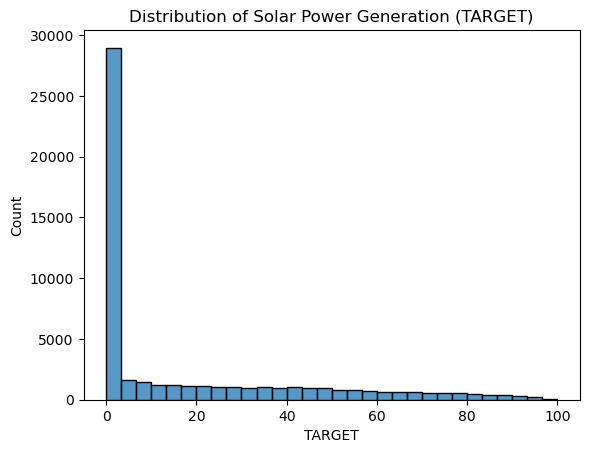

In [9]:
# 데이터 시각화하기
## histogram - 태양광 발전량 (TARGET) 분포
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

train = pd.read_csv('train/train.csv')
Target_hist = train['TARGET']

sns.histplot(Target_hist, bins=30)

plt.title('Distribution of Solar Power Generation (TARGET)')
plt.show()


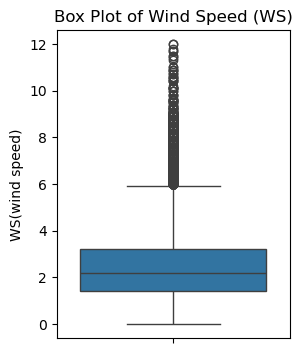

In [10]:
# box plot 이상치 확인

plt.figure(figsize=(3, 4))
WS_box = train['WS']
sns.boxplot(y=WS_box)
plt.ylabel('WS(wind speed)')
plt.title('Box Plot of Wind Speed (WS)')
plt.show()

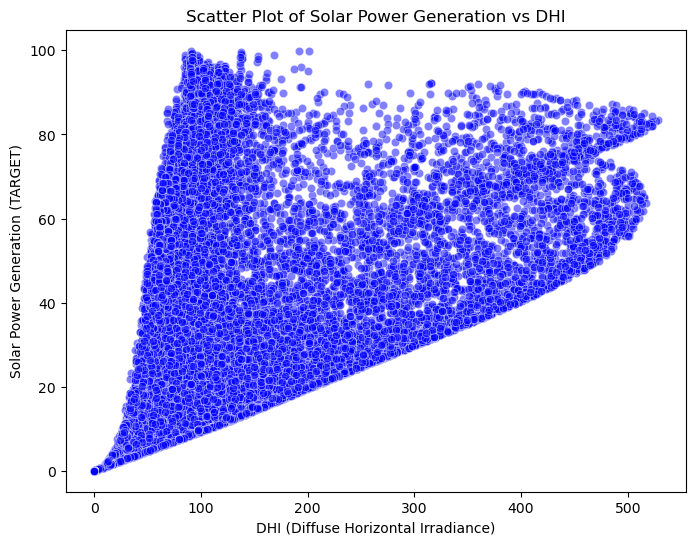

In [13]:
# 산점도 (Scatter Plot) - 태양광 발전량과 기온의 관계
# 두변수간의 관계 시각화 
# 두개의 연속형 변수가 서로 어던 관계를 가지고 있는지 시각적으로 확인
# 각 데이터가 점으로 표시, 데이터가 어떻게 퍼져 있는지를 보고 두 변수 간의 관계 파악
# DHI 수형면 산란일사량과 TARGET (태양광 발전량) 간의 관계를 시각화
plt.figure(figsize=(8, 6))
x_DHI = train['DHI']
y_TARGET = train['TARGET']

sns.scatterplot(x=x_DHI, y=y_TARGET, color='blue', alpha=0.5)
plt.xlabel('DHI (Diffuse Horizontal Irradiance)')
plt.ylabel('Solar Power Generation (TARGET)')
plt.title('Scatter Plot of Solar Power Generation vs DHI')
plt.show()

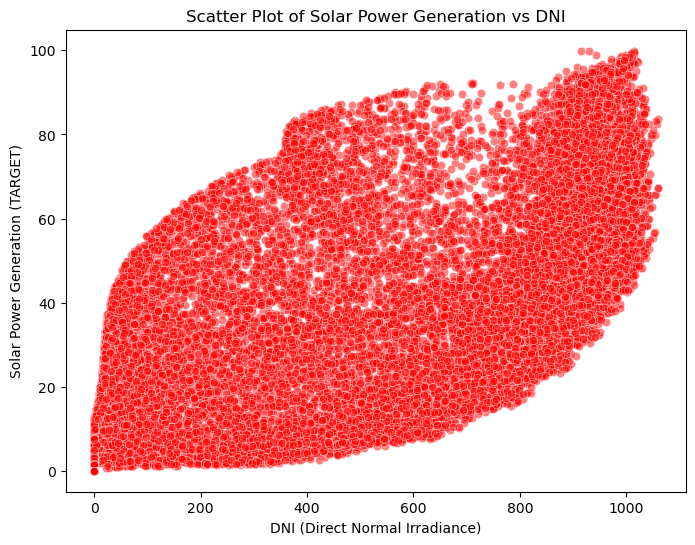

In [14]:
plt.figure(figsize=(8, 6))

x_DNI = train['DNI']
y_TARGET = train['TARGET']
sns.scatterplot(x=x_DNI, y=y_TARGET, color='red', alpha=0.5)
plt.xlabel('DNI (Direct Normal Irradiance)')
plt.ylabel('Solar Power Generation (TARGET)')
plt.title('Scatter Plot of Solar Power Generation vs DNI')
plt.show()


In [15]:
# 누락 결측치 찾기 

train.isnull().sum()

Day       0
Hour      0
Minute    0
DHI       0
DNI       0
WS        0
RH        0
T         0
TARGET    0
dtype: int64

In [17]:
# 이상치 탐지 : IQR (Interquartile Range) 방법
# IQR은 데이터의 중앙값을 기준으로 상위 25%와 하위 25% 사이의 범위를 나타내는 값
# IQR = Q3 - Q1
# Q1 (1사분위수) : 데이터의 하위 25%
# Q3 (3사분위수) : 데이터의 상위 25%
# IQR을 사용하여 이상치를 정의하는 방법
# 이상치 = Q1 - 1.5 * IQR 또는 Q3 + 1.5 * IQR
# 이 범위를 벗어나는 값은 이상치
data = {"WS": [-3, 0, 1,2,3,4,5,6,7,8,9,100]}
train_example=pd.DataFrame(data)
train_example


,WS
0,-3
1,0
2,1
3,2
4,3
5,4
6,5
7,6
8,7
9,8


In [ ]:
Q1 = train_example['WS'].quantile(0.25) # 1사분위수(Q1)
Q3 = train_example['WS'].quantile(0.75) # 3사분위수(Q3)
IQR = Q3 - Q1 # IQR 계산 ( 중간 값 범위 )
lower_bound = Q1 - 1.5 * IQR # 하한
upper_bound = Q3 + 1.5 * IQR # 상한
print(f"Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Q1: 1.750, Q3: 7.250, IQR: 5.5
Lower Bound: -6.5, Upper Bound: 15.5


# 이상치 탐지 

`quantile()` 함수를 사용하면 데이터에서 특정 분위수(Quantile) 값을 쉽게 구할 수 있다. 
데이터를 정렬한 후 , 특정 퍼센트 위치에 해당하는 값을 반환 


In [19]:
# 이상치 데이터 출력

outliers = train_example[(train_example['WS'] < lower_bound) | (train_example['WS'] > upper_bound)]
print(f"이상치 데이터: {outliers}")

이상치 데이터:      WS
11  100


In [20]:
# 이상치 탐지 : IQR 활용

import pandas as pd
train = pd.read_csv('train/train.csv')
Q1 = train['WS'].quantile(0.25) # 1사분위수(Q1)
Q3 = train['WS'].quantile(0.75) # 3사분위수(Q3)
IQR = Q3 - Q1 # IQR 계산 ( 중간 값 범위 )
lower_bound = Q1 - 1.5 * IQR # 하한
upper_bound = Q3 + 1.5 * IQR # 상한
print(f"Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
# 이상치 데이터 출력
outliers = train[(train['WS'] < lower_bound) | (train['WS'] > upper_bound)]
print(f"이상치 데이터: {outliers}") 


Q1: 1.400, Q3: 3.200, IQR: 1.8000000000000003
Lower Bound: -1.3000000000000003, Upper Bound: 5.9
이상치 데이터:         Day  Hour  Minute  DHI  DNI   WS     RH  T     TARGET
212       4    10       0   97    0  6.6  65.55  4   9.102844
213       4    10      30  129    0  7.0  65.53  4  12.105844
214       4    11       0  202  149  7.4  64.54  5  25.056006
215       4    11      30  173   20  7.7  64.51  5  17.079375
216       4    12       0  218  123  8.0  67.17  6  25.806465
...     ...   ...     ...  ...  ...  ...    ... ..        ...
51760  1078     8       0   26  602  6.0  28.22  0   8.727853
51761  1078     8      30   35  744  6.0  26.25  1  16.329351
51762  1078     9       0   41  828  6.1  27.28  3  23.742730
51763  1078     9      30   45  883  6.0  25.40  4  30.405376
51764  1078    10       0   48  920  6.0  23.61  6  36.035209

[1288 rows x 9 columns]


# 특성 간 상관관계 확인하기 

- 각 변수(`feature`)간 서로 어떤 관계를 가지고 있는지 확인하는게 중요 
- 특정 변수간에 서로 강한 연관성을 가지는지 파악하면, 모델 학습에 필요한 중요한 피쳐(feature)를 선정하는데 큰 도움 
- `상관계수(Correlation Coefficient` 분석 
  - train.corr() 함수를 사용하면, 데이터의 모든 수치형 변수 간의 상관 관계를 쉽게 확인 가능 

## 상관 계수(Correlation Coefficient)

- `-1 ~ 1` 사이의 값을 가짐. 
- `1`에 가까움 
  - 두 변수간에 강한 양의 상관관계(비례관계) 가 있음
  - ex) 기온이 높을 수록 에어컨 사용량 증가
- `0`에 가까움
  - 두 변수간에 관계가 거의 없음
- `-1`에 가까움
  - 두 변수 간에 강한 음의 상관관계( 반비례 관계 )가 있음
  - 기온이 높을 수록 난방 사용량 감소 

- 변수간에 상관계수를 나타내는 행렬(Matrix)로 출력 





In [21]:
train.corr()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
Day,1.000000e+00,-8.768311e-15,-2.089324e-19,-0.027802,0.021901,0.038477,-0.127688,0.072897,-0.002505
Hour,-8.768311e-15,1.000000e+00,1.536322e-19,0.029905,-0.018094,-0.055903,-0.084275,0.105528,0.003817
Minute,-2.089324e-19,1.536322e-19,1.000000e+00,-0.001305,-0.000997,-0.009522,0.008839,-0.007646,-0.000240
DHI,-2.780208e-02,2.990524e-02,-1.305491e-03,1.000000,0.288294,0.203286,-0.478503,0.457813,0.666908
DNI,2.190129e-02,-1.809360e-02,-9.969397e-04,0.288294,1.000000,0.219555,-0.611184,0.402460,0.833547
WS,3.847676e-02,-5.590273e-02,-9.521869e-03,0.203286,0.219555,1.000000,-0.230035,0.027693,0.238521
RH,-1.276876e-01,-8.427486e-02,8.839017e-03,-0.478503,-0.611184,-0.230035,1.000000,-0.532777,-0.677178
T,7.289695e-02,1.055284e-01,-7.646127e-03,0.457813,0.402460,0.027693,-0.532777,1.000000,0.561990
TARGET,-2.504980e-03,3.816537e-03,-2.400774e-04,0.666908,0.833547,0.238521,-0.677178,0.561990,1.000000


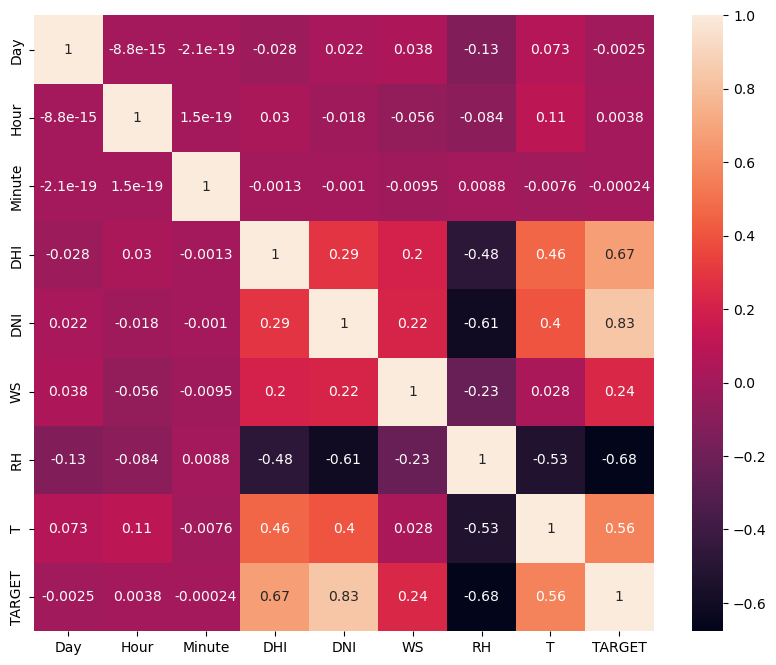

In [ ]:
# 상관관계 시각화
# 히트맵 활용

plt.figure(figsize=(10, 8))
ax = sns.heatmap(train.corr(), annot=True) # annot=True는 각 셀에 상관계수 값을 표시
plt.show()